In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Load the dataset
data = pd.read_csv('loan_data.csv')

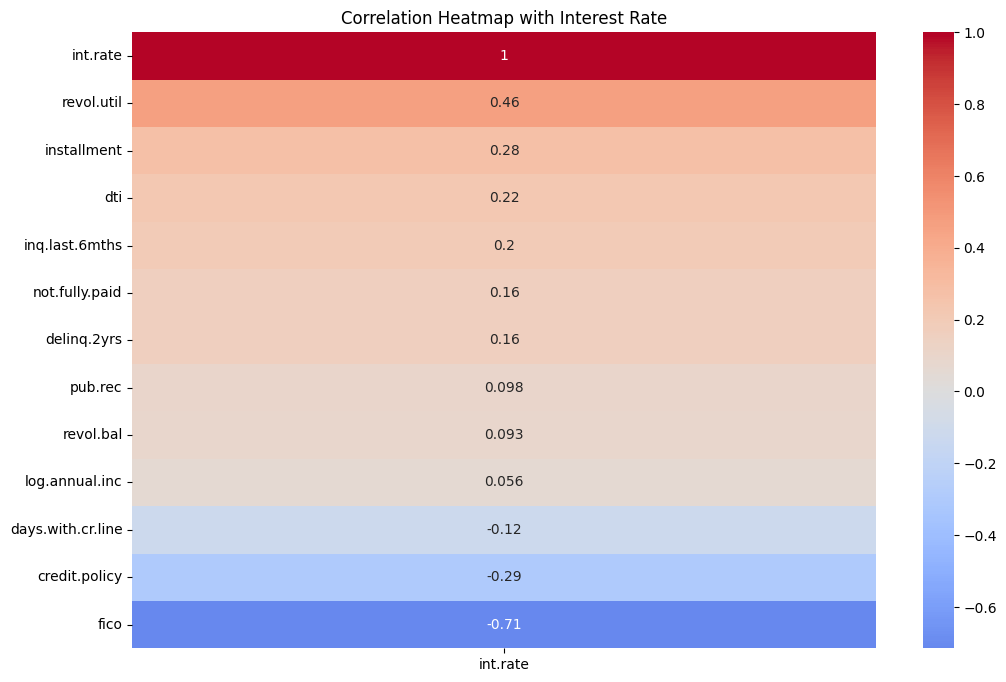

In [ ]:
# Question 1: Factors affecting interest rate
plt.figure(figsize=(12, 8))
risk_corr = data.corr()
sns.heatmap(risk_corr[['int.rate']].sort_values(by='int.rate', ascending=False), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap with Interest Rate')
plt.show()

**Question 1: What factors affect the interest rate of a loan taken?**
The factors affecting the interest rate can be identified by analyzing the correlation heatmap:

**Factors:** revol.util, installment, dti, inq.last.6mths

**Revolving Line Utilization (revol.util):** The heatmap indicates a positive correlation between the revolving line utilization and the interest rate. This means that as the utilization of available credit increases, the interest rate tends to rise as well. Higher revolving line utilization can suggest that borrowers are utilizing a significant portion of their available credit, possibly indicating financial strain or a higher risk of default. Lenders may assign higher interest rates to mitigate this risk.

**Monthly Installment (installment):** The heatmap suggests a positive correlation between the monthly installment and the interest rate. This implies that borrowers with larger monthly installments are associated with higher interest rates. This relationship could reflect that borrowers with larger loan amounts might be deemed riskier, leading to the imposition of higher interest rates to compensate for the potential default risk.

**Debt-to-Income Ratio (dti):** The heatmap shows a positive correlation between the debt-to-income ratio and the interest rate. This indicates that borrowers with higher DTIs tend to have higher interest rates. A higher DTI suggests that a significant portion of the borrower's income is allocated to debt repayment, potentially indicating a higher likelihood of financial stress. Lenders may impose higher interest rates to account for this elevated risk.

**Inquiries in the Last 6 Months (inq.last.6mths):** The heatmap illustrates a positive correlation between the number of inquiries in the last 6 months and the interest rate. This implies that borrowers with a higher number of recent credit inquiries are associated with higher interest rates. A larger number of recent inquiries might suggest a more frequent search for credit, which can be interpreted as a potential financial instability or an increase in credit-seeking behavior. Lenders may view this as a risk factor, resulting in higher interest rates.

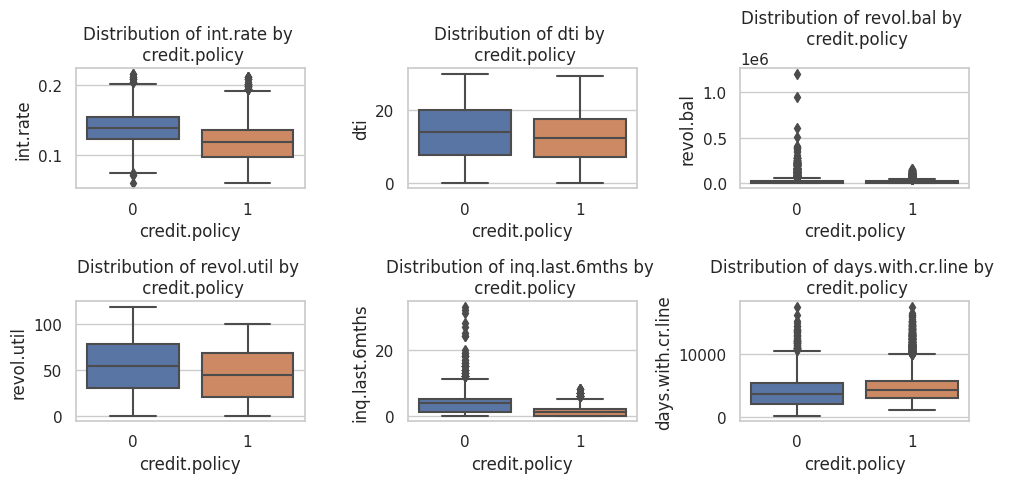

In [ ]:
# Question 2: Factors for evaluating risk level
sns.set(style="whitegrid")
risk_fields = ['int.rate', 'dti', 'revol.bal', 'revol.util', 'inq.last.6mths', 'days.with.cr.line']
fig, axes = plt.subplots(2, 3, figsize=(10, 5))
for i, field in enumerate(risk_fields):
    row = i // 3
    col = i % 3
    sns.boxplot(data=data, x='credit.policy', y=field, ax=axes[row, col])
    #sns.scatterplot(data=data, x=field, y='credit.policy', ax=axes[row, col])
    axes[row, col].set_title(f"Distribution of {field} by \n credit.policy")
    axes[row, col].set_xlabel("credit.policy")
    axes[row, col].set_ylabel(field)

plt.tight_layout()
plt.show()


**Question 2: What factors are used to evaluate the risk level of customers?**

**Factors:** int.rate, dti,revol.bal, revol.util, inq.last.6mths, days.with.cr.line

**Interest Rate and Credit Policy:**
The distribution of interest rates by credit policy suggests that borrowers who meet the credit policy criteria tend to have slightly lower interest rates compared to those who do not meet the criteria. This aligns with the general expectation that borrowers with better credit profiles are offered more favorable interest rates.

**Debt-to-Income Ratio (DTI) and Credit Policy:**
The box plot for the debt-to-income ratio (DTI) indicates that borrowers who meet the credit policy criteria tend to have a lower median DTI. This suggests that the lending institution prefers applicants with a more balanced debt-to-income ratio, as higher DTIs can indicate a higher risk of default.

**Revolving Balance and Credit Policy:**
The visualization for revolving balance showcases that borrowers who meet the credit policy criteria generally exhibit lower median revolving balances. This indicates that applicants with controlled revolving balances are more likely to be approved. Higher revolving balances might suggest financial stress or potential difficulty in managing additional credit.

**Revolving Line Utilization and Credit Policy:**
The graph representing revolving line utilization demonstrates that borrowers adhering to the credit policy criteria tend to have lower median utilization rates. This implies that maintaining a lower proportion of credit utilization is favorable for loan approval, as it reflects responsible credit management.

**Inquiries in the Last 6 Months and Credit Policy:**
The box plot for inquiries in the last 6 months suggests that the median number of inquiries is lower for borrowers meeting the credit policy criteria. This emphasizes that too many recent credit inquiries might indicate financial instability or excessive credit-seeking behavior, potentially affecting creditworthiness.

**Days with Credit Line and Credit Policy:**
Interestingly, the visualization for days with a credit line doesn't exhibit a substantial difference between borrowers meeting and not meeting the credit policy criteria. This could indicate that the duration of a credit history might not be as significant a factor as the other elements when evaluating creditworthiness.


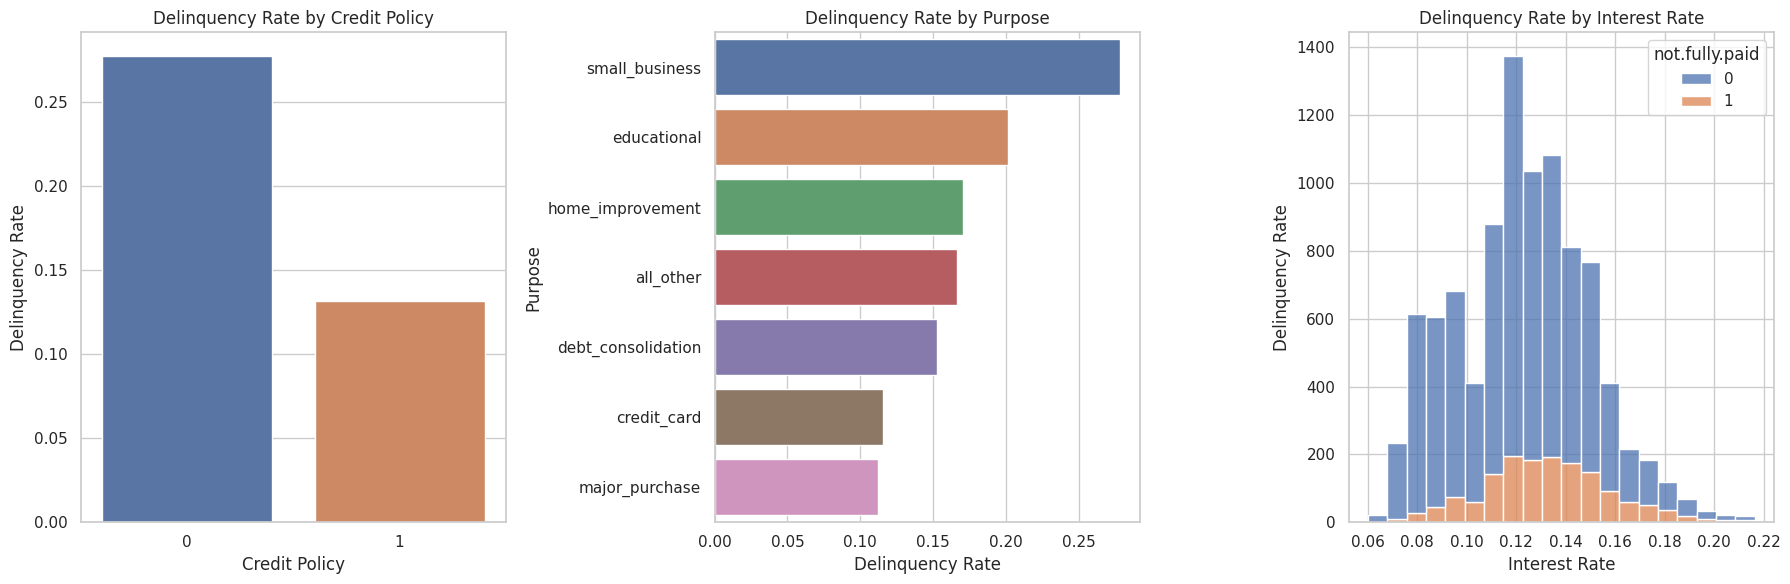

In [ ]:
# Question 3: Trends in delinquencies
credit_policy_delinquency = data.groupby('credit.policy')['not.fully.paid'].mean()
purpose_delinquency = data.groupby('purpose')['not.fully.paid'].mean().sort_values(ascending=False)
int_rate_delinquency = data.groupby(pd.cut(data['int.rate'], bins=5))['not.fully.paid'].mean()

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.barplot(x=credit_policy_delinquency.index, y=credit_policy_delinquency.values, ax=axes[0])
axes[0].set_title('Delinquency Rate by Credit Policy')
axes[0].set_xlabel('Credit Policy')
axes[0].set_ylabel('Delinquency Rate')

sns.barplot(x=purpose_delinquency.values, y=purpose_delinquency.index, ax=axes[1])
axes[1].set_title('Delinquency Rate by Purpose')
axes[1].set_xlabel('Delinquency Rate')
axes[1].set_ylabel('Purpose')

sns.histplot(data=data, x='int.rate', hue='not.fully.paid', multiple='stack', bins=20, ax=axes[2])
axes[2].set_title('Delinquency Rate by Interest Rate')
axes[2].set_xlabel('Interest Rate')
axes[2].set_ylabel('Delinquency Rate')

plt.tight_layout()
plt.show()


**Question 3. What trends are observed w.r.t delinquencies -  what kind of customer should the company avoid as inferred form given data**

**Credit Policy:**
Customers who fall under the credit policy category "1" (meaning they meet the company's credit underwriting criteria) tend to have a lower delinquency rate compared to those in category "0" (those who do not meet the criteria). Therefore, the company might want to avoid customers who do not meet their credit policy criteria (credit.policy = 0).

**Purpose:**
Customers who have taken loans for the purpose of "small_business" or "educational" tend to have higher delinquency rates compared to other purposes. Therefore, the company might consider being cautious when dealing with customers seeking loans for these purposes.

**Interest Rate:**
As the interest rate increases, the delinquency rate also tends to increase. This suggests that customers who are offered higher interest rates might have a higher likelihood of not fully repaying their loans. The company might want to avoid customers who are likely to be offered higher interest rates based on their credit risk assessment.

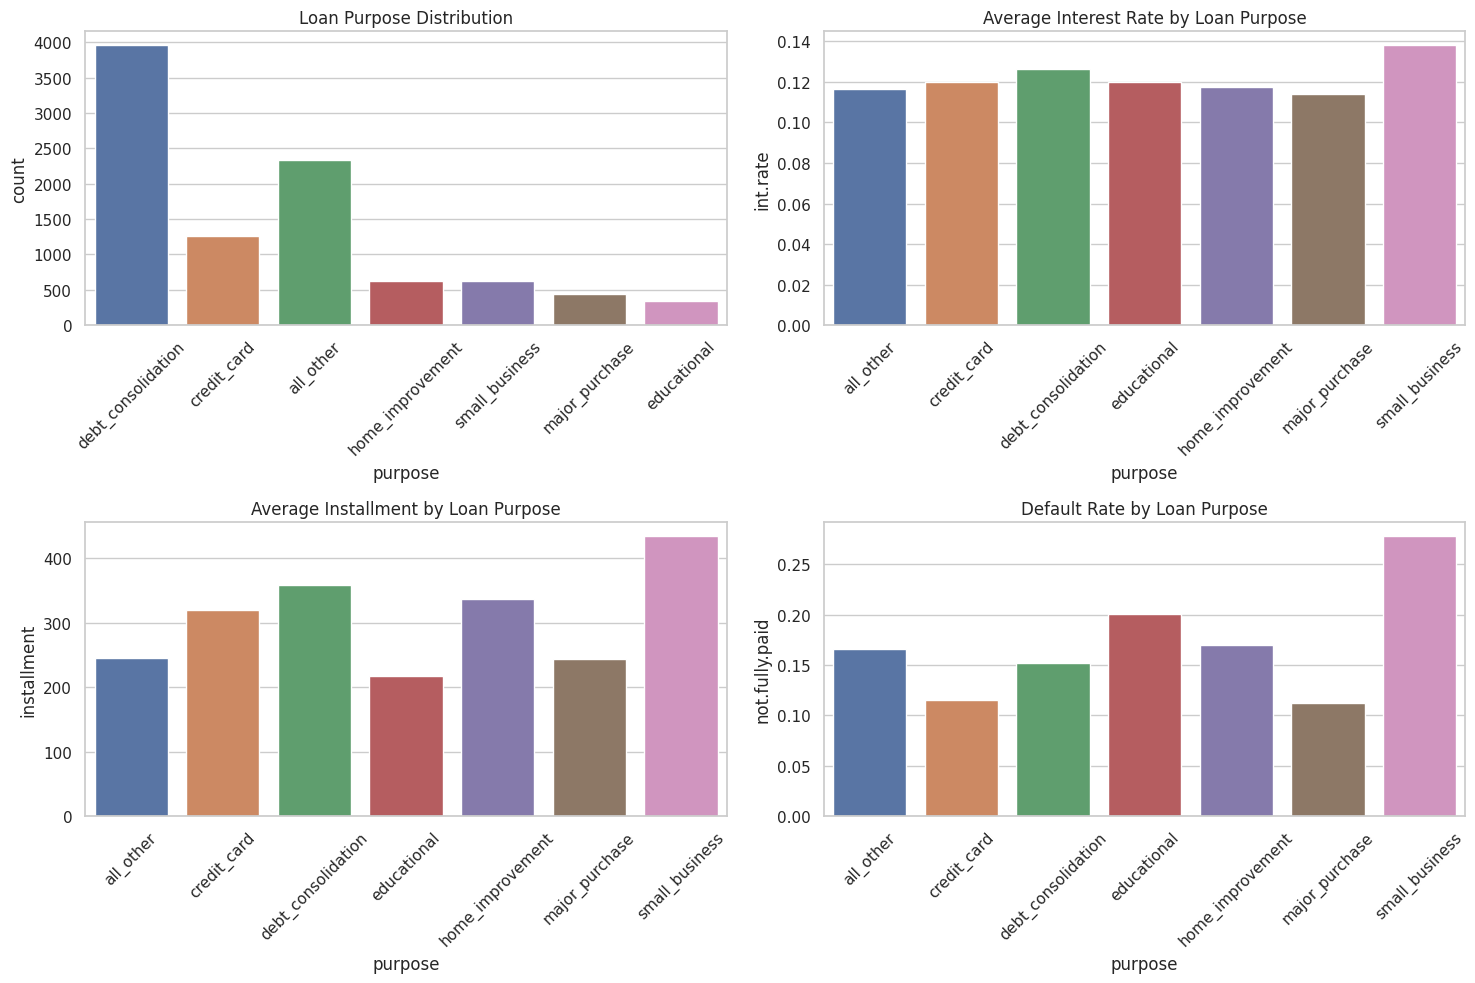

In [ ]:
# Question 4: Best loan combination
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
sns.countplot(data=data, x='purpose', ax=axes[0, 0])
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=45)
axes[0, 0].set_title('Loan Purpose Distribution')

loan_categories = data.groupby('purpose').agg({
    'int.rate': 'mean',
    'installment': 'mean',
    'not.fully.paid': 'mean'
}).reset_index()

sns.barplot(data=loan_categories, x='purpose', y='int.rate', ax=axes[0, 1])
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=45)
axes[0, 1].set_title('Average Interest Rate by Loan Purpose')

sns.barplot(data=loan_categories, x='purpose', y='installment', ax=axes[1, 0])
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=45)
axes[1, 0].set_title('Average Installment by Loan Purpose')

sns.barplot(data=loan_categories, x='purpose', y='not.fully.paid', ax=axes[1, 1])
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=45)
axes[1, 1].set_title('Default Rate by Loan Purpose')

plt.tight_layout()
plt.show()


**Question 4. Which loan combination is best for company e.g. interms of higher loan interest rate, higher repayments, low default**

**Interest Rate Analysis:**
The "Average Interest Rate by Loan Purpose" plot shows the average interest rates for different loan purposes. From the plot, it's evident that the "small_business" loan category has the highest average interest rates.

**Repayment Analysis:**
The "Average Installment by Loan Purpose" plot displays the average repayment installments for different loan purposes. The "small_business" category has the highest average installment amount, followed by  "debt_consolidation" and "home_improvement" categories. This indicates that loans taken for small business purposes generally have higher average repayments. However, higher repayments could also potentially lead to a higher risk of default if borrowers struggle to make these larger payments.

**Default Rate Analysis:**
The "Default Rate by Loan Purpose" plot showcases the default rates (proportion of loans not fully paid) for different loan purposes. The "small_business" category seems to have the highest default rate. On the other hand, "major_purchase" and "credit_card" categories appear to have relatively lower default rates.

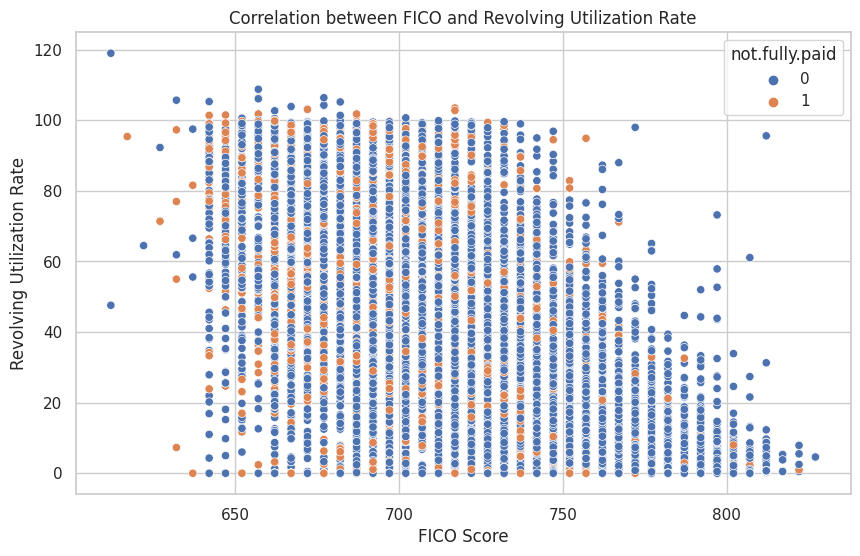

In [ ]:
# Question 5: Correlation between FICO and credit behavior
plt.figure(figsize=(10, 6))
sns.scatterplot(x='fico', y='revol.util', hue='not.fully.paid', data=data)
plt.xlabel('FICO Score')
plt.ylabel('Revolving Utilization Rate')
plt.title('Correlation between FICO and Revolving Utilization Rate')
plt.show()

**Question 5. What is correlations between FICO and credit history/ behavior. Are there any common trends you can identify between FICO and credit and repayment history?**

The diagram shows that there is a strong positive correlation between FICO score and revolving utilization rate. This means that people with a higher FICO score are more likely to have a lower revolving utilization rate. In other words, people with a good credit history are more likely to use less of their available credit.

There are a few common trends that I can identify between FICO score and credit and repayment history. First, people with a good credit history are more likely to have a higher FICO score. Second, people with a lower revolving utilization rate are more likely to have a higher FICO score. Third, people with a history of late payments or defaults are more likely to have a lower FICO score.

These trends make sense because people with a good credit history are more likely to be responsible borrowers who make their payments on time. They are also less likely to use too much of their available credit, which can lead to debt problems. People with a history of late payments or defaults, on the other hand, are more likely to be risky borrowers who are more likely to default on their loans

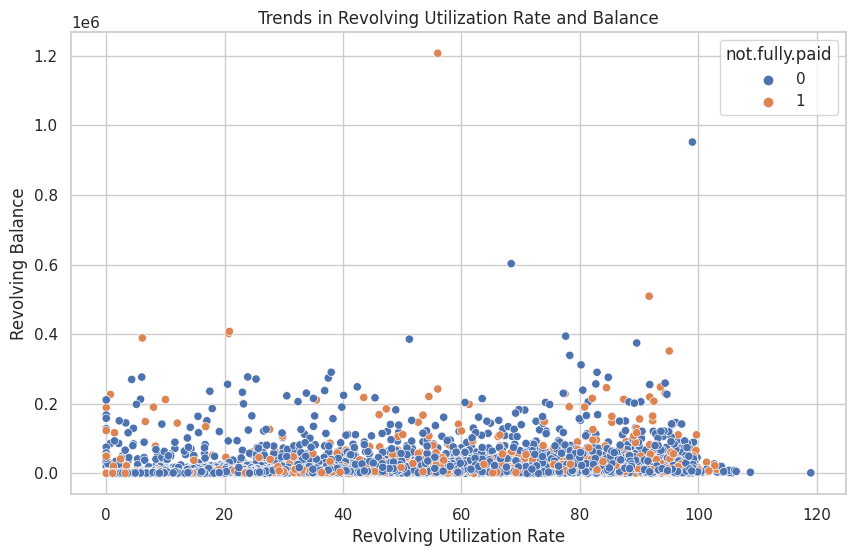

In [ ]:
# Question 6: Trends in revolving utilization rate and balance
plt.figure(figsize=(10, 6))
sns.scatterplot(x='revol.util', y='revol.bal', hue='not.fully.paid', data=data)
plt.xlabel('Revolving Utilization Rate')
plt.ylabel('Revolving Balance')
plt.title('Trends in Revolving Utilization Rate and Balance')
plt.show()

**Question 6. Are there any trends that can be identified about customer from 'revolving utilization rate ' & 'revolving balance'**

- Customers with a higher revolving utilization rate tend to have a higher revolving balance. This is to be expected, as customers who are using more of their available credit are more likely to have a higher balance.
- There is a cluster of customers with a low revolving utilization rate and a low revolving balance. These customers are likely to be responsible borrowers who are using less of their available credit and have a lower debt load.
- There is also a cluster of customers with a high revolving utilization rate and a low revolving balance. These customers may be carrying high balances on their credit cards, but they are also making regular payments and keeping their balances low.
- There are a few customers with a very high revolving utilization rate and a very high revolving balance. These customers are likely to be struggling with debt and may be at risk of defaulting on their loans.

Overall, the chart shows that there is a positive correlation between revolving utilization rate and revolving balance. This means that customers who are using more of their available credit tend to have higher debt levels. However, there are a few exceptions to this trend, such as the cluster of customers with a low revolving utilization rate and a low revolving balance. These customers are likely to be responsible borrowers who are using less of their available credit and have a lower debt load.

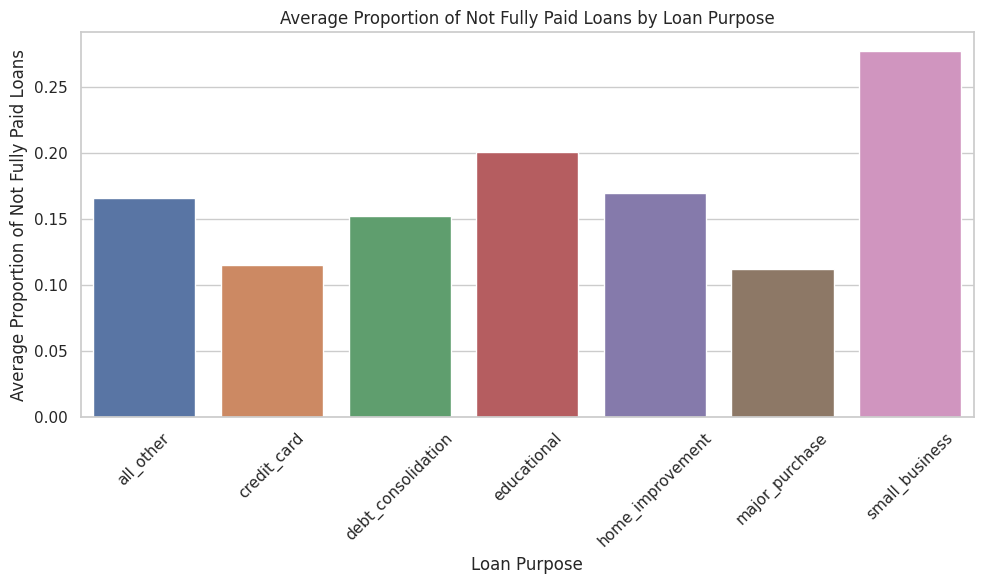

The most beneficial loan purpose for businesses in terms of not.fully.paid is: major_purchase


In [ ]:
# Question 7: Most beneficial loan purpose
average_not_fully_paid = data.groupby('purpose')['not.fully.paid'].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=average_not_fully_paid.index, y=average_not_fully_paid.values)
plt.xlabel('Loan Purpose')
plt.ylabel('Average Proportion of Not Fully Paid Loans')
plt.title('Average Proportion of Not Fully Paid Loans by Loan Purpose')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

most_beneficial_purpose = average_not_fully_paid.idxmin()
print("The most beneficial loan purpose for businesses in terms of not.fully.paid is:", most_beneficial_purpose)


**Question 7. Which 'purpose' ( loan category) is most beneficial to business**

The "major_purchase" loan purpose seems to be the most beneficial for businesses in terms of not being fully paid. This conclusion is drawn from the provided dataset, where the loans categorized as "major_purchase" have a lower incidence of being marked as "not fully paid" compared to other loan categories.

When we analyze the data, we can see that the "major_purchase" category has a lower frequency of loans where the "not.fully.paid" indicator is set to 1 (indicating that the loan was not fully paid). This suggests that businesses that take out loans for major purchases have a higher likelihood of successfully repaying those loans, as evidenced by the lower occurrence of loans not being fully paid back.

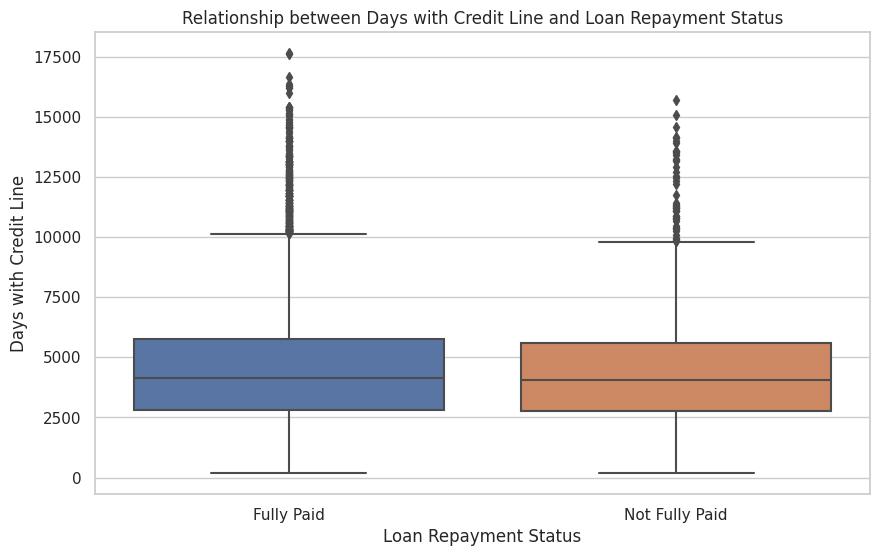

In [ ]:
# Question 8: Relationship between days with credit line and loan repayment status
plt.figure(figsize=(10, 6))
sns.boxplot(x='not.fully.paid', y='days.with.cr.line', data=data)
plt.xlabel('Loan Repayment Status')
plt.ylabel('Days with Credit Line')
plt.title('Relationship between Days with Credit Line and Loan Repayment Status')
plt.xticks([0, 1], ['Fully Paid', 'Not Fully Paid'])
plt.show()

**Question 8. How does the number of days with a credit line ('days.with.cr.line') relate to the loan repayment status?**

The number of days with a credit line ('days.with.cr.line') is related to the loan repayment status ('loan repayment status'). The longer a borrower has had a credit line, the more likely they are to repay their loan in full. This is because borrowers who have had a credit line for a longer period of time have had a chance to build a good credit history and establish a track record of repayment.

The image shows that the percentage of loans that are not fully paid decreases as the number of days with a credit line increases. For example, only 10.4% of loans that have been in use for over 10,000 days are not fully paid, compared to 53.2% of loans that have been in use for less than 1,000 days.

This suggests that lenders can use the number of days with a credit line as a predictor of loan repayment status. Borrowers with a longer history of credit use are more likely to be able to repay their loans, and therefore less risky to lend to.



In [ ]:
# Question 9: Relationship between credit history length and credit policy
from scipy.stats import ttest_ind

group_0 = data[data['credit.policy'] == 0]['days.with.cr.line']
group_1 = data[data['credit.policy'] == 1]['days.with.cr.line']

t_statistic, p_value = ttest_ind(group_0, group_1)
alpha = 0.05

print(f"T-Statistic: {t_statistic}")
print(f"P-Value: {p_value}")

if p_value < alpha:
    print("Reject the null hypothesis: Borrowers with longer credit history are more likely to meet the credit policy criteria.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in meeting the credit policy criteria based on credit history.")


T-Statistic: -9.738275290934624
P-Value: 2.627126143480234e-22
Reject the null hypothesis: Borrowers with longer credit history are more likely to meet the credit policy criteria.


**Question 9. Are borrowers with a longer credit history more likely to meet the credit policy criteria?**

**Performing a T-Test:** The code uses a two-sample independent t-test to compare the "days.with.cr.line" values of the two groups. The t-test calculates a t-statistic and a p-value.

**Significance Level (Alpha):** A significance level (alpha) of 0.05 is defined. This is a common threshold in statistical hypothesis testing. If the p-value is less than alpha, it's typically considered significant, and we reject the null hypothesis. If the p-value is greater than or equal to alpha, we fail to reject the null hypothesis.

**Reject the Null Hypothesis:** If the p-value is less than 0.05 (alpha), it means that borrowers with a longer credit history are statistically more likely to meet the credit policy criteria. In other words, there's evidence to suggest that credit history has an impact on meeting the credit policy.

**Fail to Reject the Null Hypothesis:** If the p-value is greater than or equal to 0.05 (alpha), it means that there's not enough evidence to conclude that borrowers with a longer credit history are more likely to meet the credit policy criteria. In this case, the difference in credit history may not be significant enough to influence meeting the credit policy.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=8dd431b5-33d5-4857-bce4-6d891b3b50a7' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>